# Image Clustering  
In diesem Notebook wurde erprobt, wie es möglich ist die Bilder des Datensatzes in ein zweidimensionales Koordinatenkreuz zu clustern.  
Varobilder für dieses Notebook waren folgende Tutorials und Websites:  
[A demo of K-Means clustering on the handwritten digits data](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)  
[How to Plot K-Means Cluster with Python?](https://www.askpython.com/python/examples/plot-k-means-clusters-python)  
[How to cluster images based on visual similarity](https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34)  
[How to use custom png image marker with plot?](https://stackoverflow.com/questions/2318288/how-to-use-custom-png-image-marker-with-plot)

In [1]:
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

### Zugriff auf die Bilder

In [2]:
# path = "E:\PowerFolders\Masterarbeit\\1_Datensaetze\\first_annotation_dataset\\"
path = "E:\PowerFolders\Masterarbeit\\1_Datensaetze\\personData200\\"
# path = "E:\PowerFolders\Masterarbeit\\Bilder\\"
all_image_names = [image for image in os.listdir(path) if image.endswith(".jpg") or image.endswith(".JPG")]
print(len(all_image_names))

200


### Zugriff auf Bilder in Unterordnern

In [3]:
# def get_all_pictures(path):
dir_list = os.listdir(path)
print(dir_list)
print(len(dir_list))
all_image_names = []
for folder in dir_list:
    filenames = [folder + "\\" + image for image in os.listdir(path + folder) if image.endswith(".jpg") or image.endswith(".JPG")]
    all_image_names = all_image_names + filenames

['eins1_(125).JPG', 'eins1_(125).json', 'eins1_(132).JPG', 'eins1_(132).json', 'eins1_(133).JPG', 'eins1_(133).json', 'eins1_(134).JPG', 'eins1_(134).json', 'eins1_(137).JPG', 'eins1_(137).json', 'eins1_(138).JPG', 'eins1_(138).json', 'eins1_(142).JPG', 'eins1_(142).json', 'eins1_(145).JPG', 'eins1_(145).json', 'eins1_(154).JPG', 'eins1_(154).json', 'eins1_(155).JPG', 'eins1_(155).json', 'eins1_(156).JPG', 'eins1_(156).json', 'eins1_(161).JPG', 'eins1_(161).json', 'eins1_(165).JPG', 'eins1_(165).json', 'eins1_(166).JPG', 'eins1_(166).json', 'eins1_(173).JPG', 'eins1_(173).json', 'eins1_(178).JPG', 'eins1_(178).json', 'eins1_(181).JPG', 'eins1_(181).json', 'eins1_(187).JPG', 'eins1_(187).json', 'eins1_(195).JPG', 'eins1_(195).json', 'eins1_(197).JPG', 'eins1_(197).json', 'eins1_(203).JPG', 'eins1_(203).json', 'eins1_(208).JPG', 'eins1_(208).json', 'eins1_(214).JPG', 'eins1_(214).json', 'eins1_(215).JPG', 'eins1_(215).json', 'eins1_(216).JPG', 'eins1_(216).json', 'eins1_(222).JPG', 'eins

NotADirectoryError: [WinError 267] Der Verzeichnisname ist ungültig: 'E:\\PowerFolders\\Masterarbeit\\1_Datensaetze\\personData200\\eins1_(125).JPG'

### Das Modell (VGG16)

In [3]:
model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

### Einlesen eines Bildes in Schwarz und Weiß

In [29]:
image = Image.open(path + all_image_names[0]).convert("L").resize((244, 244))
image.show()
image = np.array(image)
print(image.shape)

(244, 244)


### Einlesen eines Bildes in Farbe

In [7]:
image = Image.open(path + all_image_names[0]).resize((224, 224))
image.show()
image = np.array(image)
print(image.shape)

(224, 224, 3)


### Features von allen Bildern einlesen (monochrom)

In [64]:
def extract_features(file, model):
    image = Image.open(file).convert("L").resize((244, 244))
    image = np.array(image)
    reshaped_image = image.reshape(1, 224, 224)
    image_data = preprocess_input(reshaped_image)
    feature = model.predict(image_data, use_multiprocessing=True)
    return feature

### Features von allen Bildern einlesen (Farbe)

In [4]:
def extract_features(file, model):
    image = Image.open(file).resize((224, 224))
    image = np.array(image)
    reshaped_image = image.reshape(1, 224, 224, 3)
    image_data = preprocess_input(reshaped_image)
    feature = model.predict(image_data, use_multiprocessing=True)
    return feature

In [5]:
features_dictionary = {}
for name in all_image_names:
    features_dictionary[name] = extract_features(path + name, model)

### Features preprocessen (VGG16)

In [6]:
features = np.array(list(features_dictionary.values()))
print(features.shape)
features = features.reshape(-1, 4096)
print(features.shape)

pca = PCA(n_components=2, random_state=22)
pca.fit(features)


transformed_features = pca.transform(features)

print(transformed_features.shape)
# print(transformed_features)

(200, 1, 4096)
(200, 4096)
(200, 2)


### kmeans

In [7]:
kmeans = KMeans(n_clusters=2, n_jobs=-1, random_state=22)
label_list = kmeans.fit_predict(transformed_features)

print(label_list)
print(len(label_list))
print(features_dictionary.keys())

[0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]
200
dict_keys(['eins1_(125).JPG', 'eins1_(132).JPG', 'eins1_(133).JPG', 'eins1_(134).JPG', 'eins1_(137).JPG', 'eins1_(138).JPG', 'eins1_(142).JPG', 'eins1_(145).JPG', 'eins1_(154).JPG', 'eins1_(155).JPG', 'eins1_(156).JPG', 'eins1_(161).JPG', 'eins1_(165).JPG', 'eins1_(166).JPG', 'eins1_(173).JPG', 'eins1_(178).JPG', 'eins1_(181).JPG', 'eins1_(187).JPG', 'eins1_(195).JPG', 'eins1_(197).JPG', 'eins1_(203).JPG', 'eins1_(208).JPG', 'eins1_(214).JPG', 'eins1_(215).JPG', 'eins1_(216).JPG', 'eins1_(222).JPG', 'eins1_(223).JPG', 'eins1_(230).JPG', 'eins1_(235).JPG', 'eins1_(238).JPG', 'eins1_(

### Split labels and names in a dictionary

In [8]:
labels_and_names = {}
for i, label in enumerate(label_list):
    if label not in labels_and_names:
        labels_and_names[label] = [all_image_names[i]]
    else:
        labels_and_names[label].append(all_image_names[i])
# print(labels_and_names)

### image in plot function

In [9]:
def image_in_plot(i, name, cluster):
    image = Image.open(path + name).resize((50, 75))
    ax = plt.gca()
    im = OffsetImage(image)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cluster[:, 0][i], cluster[:, 1][i]), frameon=False, pad=0.0,)
    ax.add_artist(ab)

### Plotte die Daten

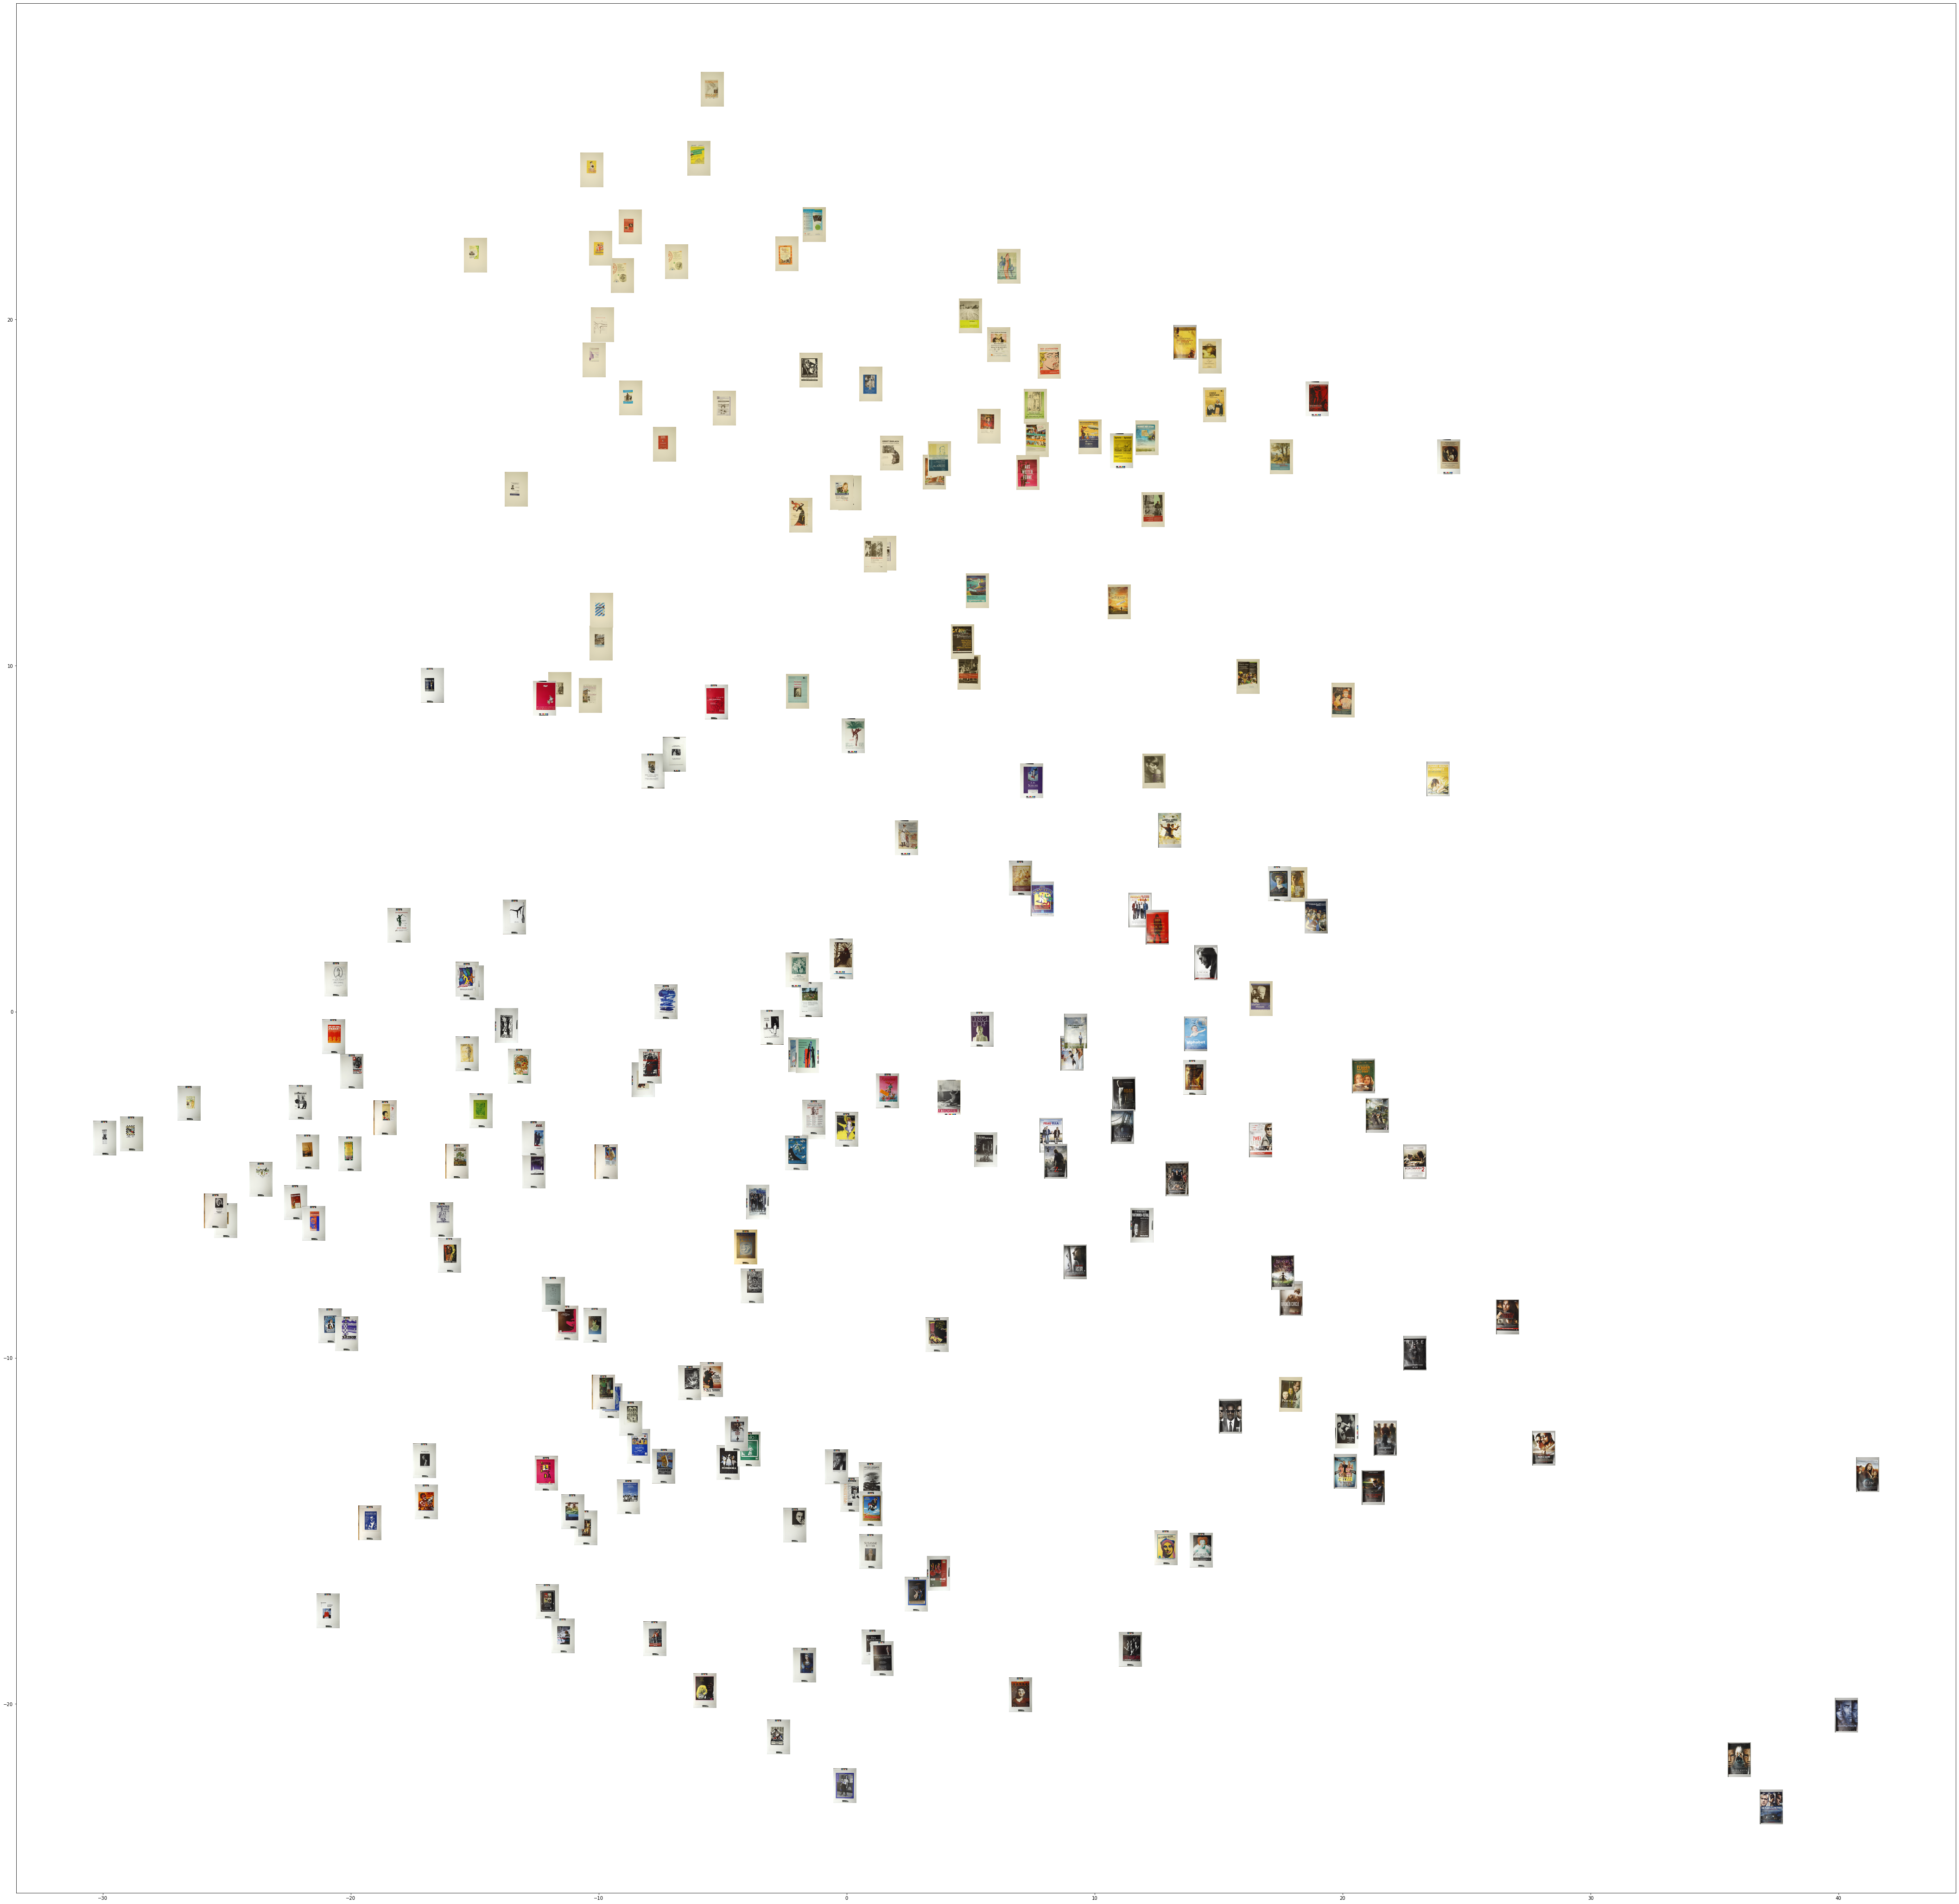

In [10]:
filtered_label0 = transformed_features[label_list == 0]
filtered_label1 = transformed_features[label_list == 1]

fig = plt.figure(figsize=(75, 75))

plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], color = "black")
plt.scatter(filtered_label1[:, 0], filtered_label1[:, 1])
# plt.axis([-40, 100, -40, 100])


for i, name in enumerate(labels_and_names[0]):
    # plt.text(filtered_label0[:, 0][i], filtered_label0[:, 1][i], name)
    image_in_plot(i, name, filtered_label0)
for j, name in enumerate(labels_and_names[1]):
    # plt.text(filtered_label1[:, 0][i], filtered_label1[:, 1][i], name)
    image_in_plot(j, name, filtered_label1)
plt.show()

In [23]:
data = load_digits().data
pca = PCA(2)

df = pca.fit_transform(data)

print(data.shape)
print(df.shape)

(1797, 64)
(1797, 64)
(1797, 2)


In [3]:
kmeans = KMeans(n_clusters=10)
label = kmeans.fit_predict(df)

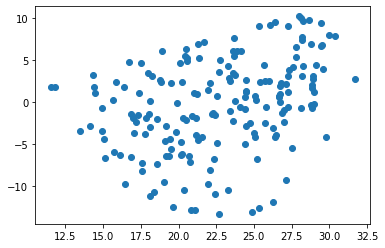

In [6]:
filtered_label0 = df[label==0]

plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1])
plt.show()

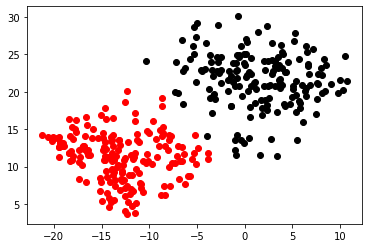

In [7]:
filtered_label2 = df[label == 2]
filtered_label8 = df[label == 8]

plt.scatter(filtered_label2[:, 0], filtered_label2[:, 1], color="red")
plt.scatter(filtered_label8[:, 0], filtered_label8[:, 1], color="black")
plt.show()

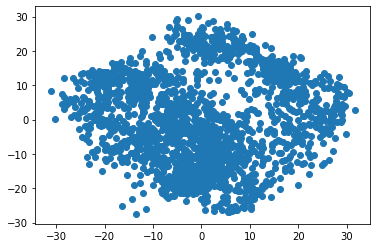

In [8]:
plt.scatter(df[:, 0], df[:, 1])
plt.show()

In [10]:
labels = {}

for element in label:
    labels["label_"+str(element)] = df[label == element]

<function matplotlib.pyplot.show(*args, **kw)>

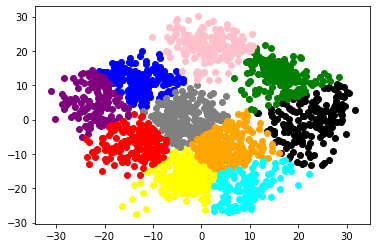

In [12]:
plt.scatter(labels["label_0"][:, 0], labels["label_0"][:, 1], color = "black")
plt.scatter(labels["label_1"][:, 0], labels["label_1"][:, 1], color = "yellow")
plt.scatter(labels["label_2"][:, 0], labels["label_2"][:, 1], color = "blue")
plt.scatter(labels["label_3"][:, 0], labels["label_3"][:, 1], color = "gray")
plt.scatter(labels["label_4"][:, 0], labels["label_4"][:, 1], color = "orange")
plt.scatter(labels["label_5"][:, 0], labels["label_5"][:, 1], color = "green")
plt.scatter(labels["label_6"][:, 0], labels["label_6"][:, 1], color = "purple")
plt.scatter(labels["label_7"][:, 0], labels["label_7"][:, 1], color = "cyan")
plt.scatter(labels["label_8"][:, 0], labels["label_8"][:, 1], color = "pink")
plt.scatter(labels["label_9"][:, 0], labels["label_9"][:, 1], color = "red")
plt.show